## Lake Zug microCTD plan (1.13.2026)

In [1]:
# imports
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Lake Zug bathymetry
bathy = xr.open_dataset('../../../../data/lake_zug/bathymetry/zugersee_bathy.nc')

In [10]:
mctd_locs = pd.DataFrame({
    'loc': ['VMPS', 'P9', 'P10', 'VMPC', 'VMPW', 'PC', 'P6', 'P7', 'P3', 'P4'],
    'xsc': [680442, 680409, 680814, 680105, 679911, 680146, 680030, 680150, 679663, 679415],
    'ysc': [216834, 217437, 216239, 218781, 218799, 218508, 218872, 218462, 221650, 220433]
})

mctd_locs['xsc'] += int(2e6)
mctd_locs['ysc'] += int(1e6)

mctd_locs

,loc,xsc,ysc
0,VMPS,2680442,1216834
1,P9,2680409,1217437
2,P10,2680814,1216239
3,VMPC,2680105,1218781
4,VMPW,2679911,1218799
5,PC,2680146,1218508
6,P6,2680030,1218872
7,P7,2680150,1218462
8,P3,2679663,1221650
9,P4,2679415,1220433


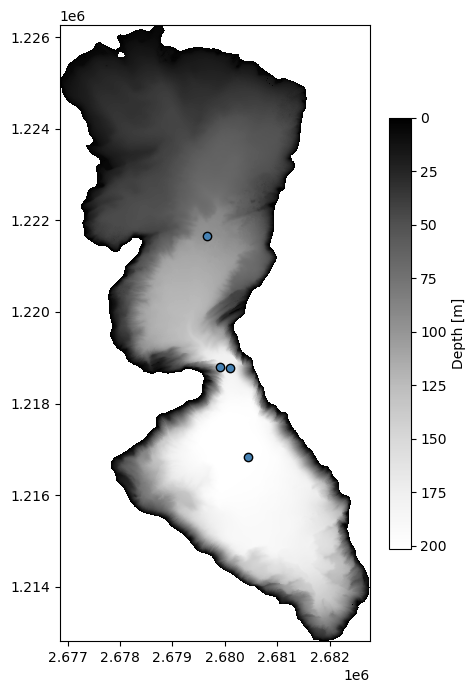

In [16]:
fig, ax = plt.subplots(figsize=(5, 8))

im = ax.pcolormesh(bathy['xsc'], bathy['ysc'], bathy['depth'], cmap='Greys_r', vmin=0)
cbar = fig.colorbar(im, shrink=0.7, label='Depth [m]', ax=ax)
cbar.ax.invert_yaxis()

# mCTD locations
for _, row in mctd_locs.iterrows():
    if row['loc'] in ['VMPS', 'VMPC', 'VMPW', 'P3']:
        ax.scatter(row.xsc, row.ysc, c='steelblue', edgecolor='black')
        #ax.annotate(row['loc'], (row.xsc, row.ysc), color='red', xytext=(3, 0), textcoords='offset points')

plt.show()

In [13]:
mooring_locs = pd.DataFrame({
    'loc': ['LZC', 'LZE', 'LZW', 'LZN'],
    'xsc': [2680084, 2680314, 2679912, 2679436],
    'ysc': [1218840, 1218883, 1218760, 1219384]
})
# LZW ysc = 1218770?
mooring_locs

,loc,xsc,ysc
0,LZC,2680084,1218840
1,LZE,2680314,1218883
2,LZW,2679912,1218760
3,LZN,2679436,1219384


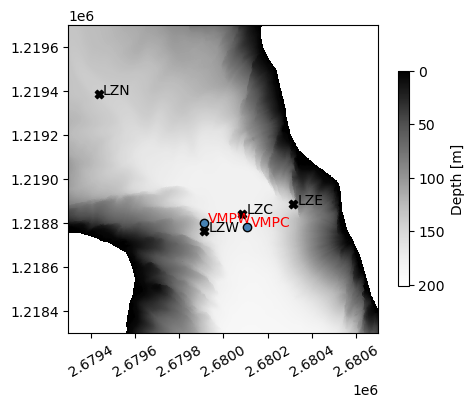

In [17]:
fig, ax = plt.subplots(figsize=(5, 4))

im = ax.pcolormesh(bathy['xsc'], bathy['ysc'], bathy['depth'], cmap='Greys_r', vmin=0)
cbar = fig.colorbar(im, shrink=0.7, label='Depth [m]', ax=ax)
cbar.ax.invert_yaxis()

# mCTD locations
for _, row in mctd_locs.iterrows():
    if row['loc'] in ['VMPS', 'VMPC', 'VMPW', 'P3']:
        ax.scatter(row.xsc, row.ysc, c='steelblue', edgecolor='black')
        ax.annotate(row['loc'], (row.xsc, row.ysc), color='red', xytext=(3, 0), textcoords='offset points')

# mooring locations
for _, row in mooring_locs.iterrows():
    # deployed locations
    ax.scatter(row.xsc, row.ysc, c='black', edgecolor='black', marker='X')
    ax.annotate(row['loc'], (row.xsc, row.ysc), color='black', xytext=(3, 0), textcoords='offset points')

ax.tick_params(axis='x', rotation=30)

ax.set_xlim(2679300, 2680700)
ax.set_ylim(1218300, 1219700)

plt.show()